In [2]:
# !pip install seaborn
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

## EDA

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:

ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [8]:
movies[movies.movieId.isin(ratings.movieId.value_counts()[0:5].index.tolist())].merge(ratings, left_index=True, right_on='movieId').groupby(['movieId', 'title'])['rating'].mean()

movieId  title                           
292      Pulp Fiction (1994)                 3.410501
314      Shawshank Redemption, The (1994)    3.849934
351      Forrest Gump (1994)                 3.304937
585      Silence of the Lambs, The (1991)    2.661682
2480     Matrix, The (1999)                  3.026316
Name: rating, dtype: float64

### Data preprocessing

In [9]:
movies.genres
out = []
for genre in movies.genres:
    out.append(genre.split('|'))

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
binarized_genres = binarizer.fit_transform(np.array(out))
GENRES = binarizer.classes_
binarized_genres

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [11]:
movies[GENRES] = binarized_genres
movies.drop(columns='genres', inplace=True)
movies

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62419,209159,Window of the Soul (2001),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62420,209163,Bad Poems (2018),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62421,209169,A Girl Thing (2001),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


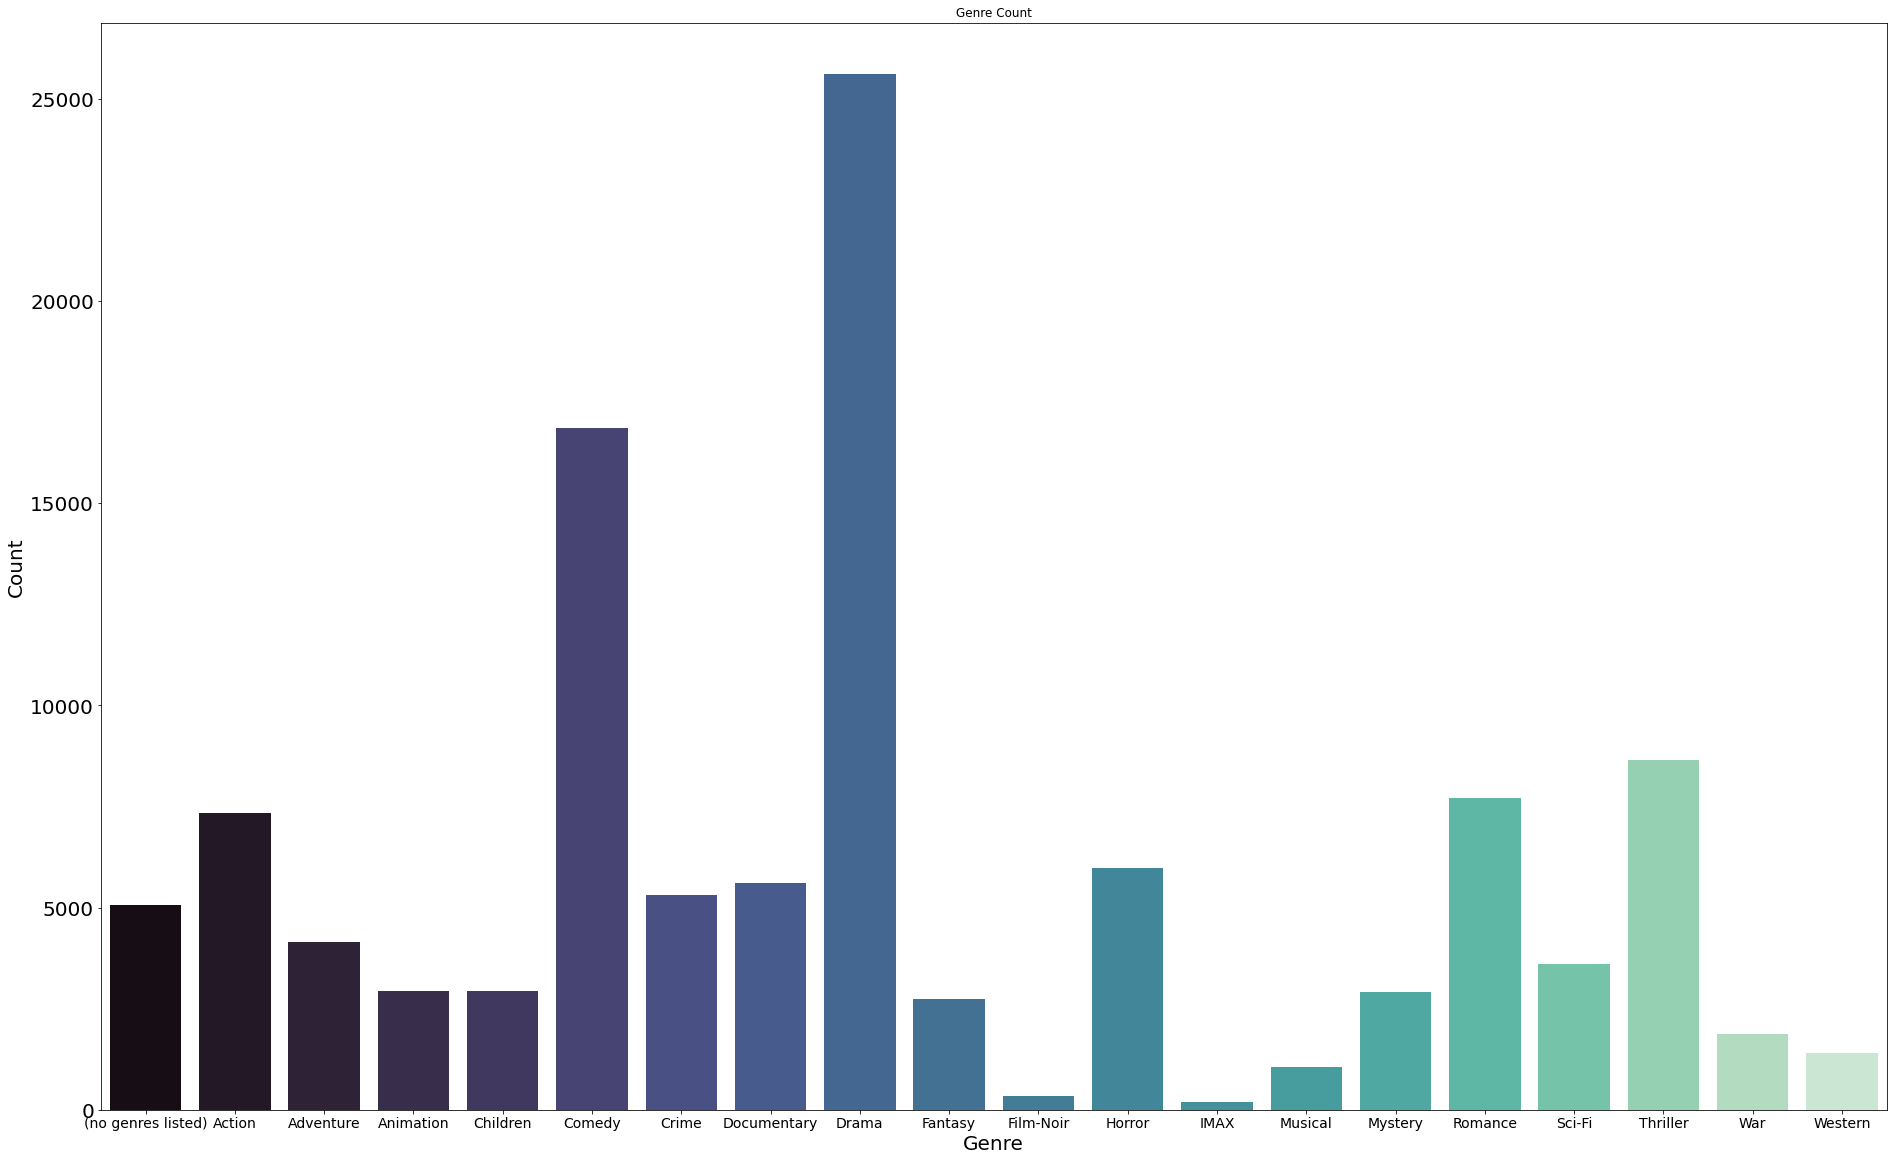

In [12]:
count = []
for c in GENRES:
    count.append(movies[c].sum())
    
plt.figure(figsize=(32, 20))
sns.barplot(x=GENRES, y=movies[GENRES].sum(), palette='mako')

plt.title('Genre Count')
plt.xlabel('Genre', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 20)
plt.show()

In [13]:
# sns.countplot(data=tags, x='tag')
# very expensive

The mean rating is: 3.533854451353085
The mode rating is: 4.0


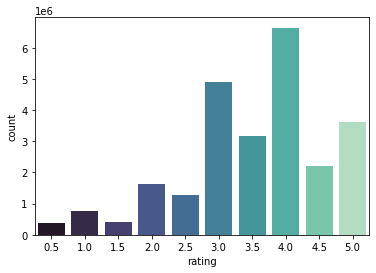

In [14]:
sns.countplot(data=ratings, x='rating', palette='mako')
print(f"The mean rating is: {ratings.rating.mean()}")
print(f"The mode rating is: {ratings.rating.mode()[0]}")

In [15]:
print(len(ratings.userId.unique()))


162541


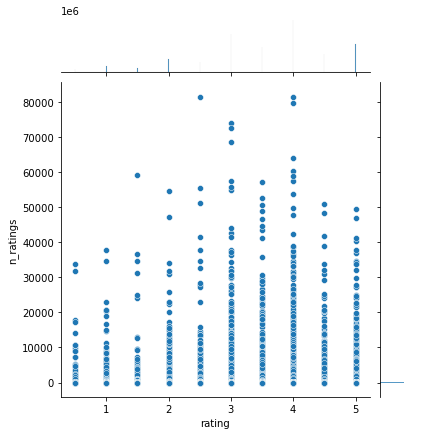

In [16]:
ratings['n_ratings'] = pd.DataFrame(ratings.groupby('movieId').count()['rating'])
sns.jointplot(x=ratings['rating'], y=ratings['n_ratings'], data=ratings)
plt.show()

### Naive Collaborative filtering implementation (NO ML)

In [17]:
def recommendation_score(movie_id, rating_thresh=3.5, percent_thresh=0.1, n_movies=5):
    '''
    description - Function that returns a recommendation score (higher score -> better recommendation)
    Inputs:
        movie_id: int 
            Id of the movie we will use to find recommendations.
        rating_thresh: 
            used to filter movies with a rating threshold greater than the value.
        percent_thresh: 
            used to filter movies with a rating threshold greater than the value.
    '''
    # Subset of users that like the same movie
    user_subset = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] >= rating_thresh)]["userId"].unique()
    # Ratings of other movies that similar users 
    user_subset_recommendations = ratings[(ratings["userId"].isin(user_subset)) & (ratings['rating'] > rating_thresh)]['movieId']
    
    # Percentage of users that liked each movie and filter based on percent_thresh
    user_subset_recommendations = user_subset_recommendations.value_counts() / len(user_subset)
    user_subset_recommendations = user_subset_recommendations[user_subset_recommendations > percent_thresh]
    
    # Find users that have rated the movies in our current subset
    all_users = ratings[(ratings["movieId"].isin(user_subset_recommendations.index)) & (ratings["rating"] > rating_thresh)]
    # Percentage of all users that liked the movie
    all_user_recommendations = all_users["movieId"].value_counts() / len(all_users["userId"].unique()) 
    
    # Calculate a recommendation score based on similar users and overall users (we aren't interested in obvious relationships)
    rec_percentages = pd.concat([user_subset_recommendations, all_user_recommendations], axis=1)
    rec_percentages.columns = ["subset_users", "avg_users"]
    rec_percentages['recommendation_score'] = rec_percentages["subset_users"] / rec_percentages["avg_users"]
    rec_percentages = rec_percentages.sort_values("recommendation_score", ascending=False)
    
    return rec_percentages.head(n_movies).merge(movies, left_index=True, right_on="movieId")
    


In [18]:
recommendation_score(2, 4.0)

,subset_users,avg_users,recommendation_score,movieId,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0.322257,0.017706,18.200580,2,Jumanji (1995),0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
578,0.113461,0.020614,5.504137,586,Home Alone (1990),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
495,0.168439,0.030844,5.460957,500,Mrs. Doubtfire (1993),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0.117327,0.022579,5.196343,367,"Mask, The (1994)",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
721,0.110561,0.022088,5.005570,736,Twister (1996),0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [19]:
movies = pd.read_csv('movies_small.csv')
links = pd.read_csv('links_small.csv')
ratings = pd.read_csv('ratings_small.csv')
tags = pd.read_csv('tags_small.csv')

### Implement a factorization matrix to capture the taste space of the user

In [20]:
factorization_matrix = ratings.pivot(index='movieId', columns='userId', values='rating')
factorization_matrix.fillna(0, inplace=True)

In [22]:
from scipy.sparse import csr_matrix
# Throws error if not used while training KNN
factorization_matrix = csr_matrix(factorization_matrix.values)

In [29]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine', n_neighbors=20)
model.fit(factorization_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [30]:
# new_ratings = [[0] * factorization_matrix.shape[0]]

In [31]:
!pip install fuzzywuzzy

In [32]:
from fuzzywuzzy import process

def knn_recommender(movie_name, data, n):
    # Allows us to match strings (tf-idf)
    idx = process.extractOne(movie_name, movies['title'])[2]
    print(movies['title'][idx])
    distance, indices = model.kneighbors(data[idx], n_neighbors=n)
    print(movies['title'][indices[0]])

In [33]:
knn_recommender('jumanji', factorization_matrix, 6)

Jumanji (1995)
1             Jumanji (1995)
322    Lion King, The (1994)
436    Mrs. Doubtfire (1993)
325         Mask, The (1994)
418     Jurassic Park (1993)
504        Home Alone (1990)
Name: title, dtype: object
